In [136]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### Airbus

In [137]:
airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
airbus_df.drop(columns=['dim of z2 private'], inplace=True)
airbus_df.rename(columns={"dim of z1 private": "$Z_1$", "dim of z1 share": "$Z_2$"}, inplace=True)
airbus_df = airbus_df[airbus_df['method'] != 'No NDPCA']

JAE_map = [[0.2781, 0.6603, 0.7343, 0.8007]
          ,[0.2905, 0.5993, 0.6646, 0.7595]
]
DAE_map = [[0.2087, 0.5329, 0.6188, 0.6531]
          ,[0.1453, 0.5617, 0.5843, 0.6338]
]

# 0.6434 0.7866
# Sep_map = [[0, 0, 0, X]
# 		  ,[0, 0, 0, X]
# ]

### ablation study
# NoPCA_map = [[] X
	     		# X
# ]

AE_Zs = [4, 12, 20, 40]

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(JAE_map)):
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': DAE_map[seed][z_ind], 'method': 'DAE', 'seed': seed}, ignore_index=True)
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': JAE_map[seed][z_ind], 'method': 'JAE', 'seed': seed}, ignore_index=True)


for z in np.arange(4, 41, 4): ### latent dim
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 0}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 1}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0.83, 'method': 'Uncompressed', 'seed': 0}, ignore_index=True)

idx = airbus_df[(airbus_df['method'] == 'No DPCA module')].index
airbus_df.drop(idx, inplace=True)


### Plots

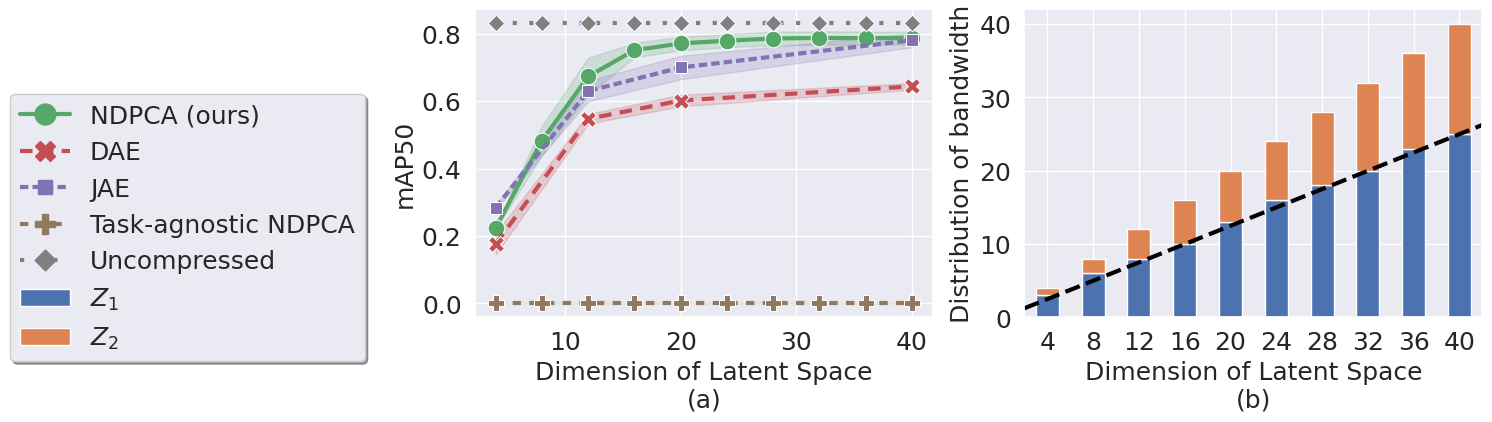

In [138]:
fig, ax_list = plt.subplot_mosaic(
        [["airbus_dpca", "airbus_z"]],
        figsize=(15, 4))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

plt.subplots_adjust(hspace=0.27)
xylabelsize = 18
titlesize = 26
legendsize = 20
ticksize = 18

plot1_xlabel = "Dimension of Latent Space"
plot1_ylabel = "Distribution of bandwidth"

### Plot AirBus Detection
## plot DPCA curve
ax6 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3], color_list[4], color_list[5], 'gray'], dashes=['', (3,2), (2,1), (2,2), (1,3)], markers=True, markersize=12)
# NDPCA, DAE, JAE, agnostic, uncompressed
# green, red, purple, brown, gray
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space"+'\n(a)', fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
ax_list["airbus_dpca"].legend().remove()
## plot Z1 and Z2
airbus_df_z = airbus_df.loc[(airbus_df["method"]).str.contains('ours') & (airbus_df["seed"] == 1) ]
airbus_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["airbus_z"],
                x="dpca_dim", y=["$Z_1$", "$Z_2$"], width=0.5, rot=0)
ax_list["airbus_z"].plot([-0.5, 9.5], [1.25, 26.25], color='black', linestyle='dashed', linewidth=3)
ax_list["airbus_z"].set_xlabel(plot1_xlabel+'\n(b)', fontsize=xylabelsize)
ax_list["airbus_z"].set_ylabel(plot1_ylabel, fontsize=xylabelsize)
ax_list["airbus_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["airbus_z"].legend().remove()


### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["airbus_dpca"], ax_list["airbus_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc=1, bbox_to_anchor=(0.05, 0.7), fancybox=True, shadow=True, ncol=1, fontsize=18, markerscale=2.5)
for line in lgd.get_lines():
    line.set_linewidth(3.0)
plt.show()
fig.savefig('./results_airbus.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')